In [2]:
import pandas as pd
import numpy as np

sun_data=pd.read_csv('21~22년 태양광 데이터.csv')
sun_data.head()

,datetime,power,inclination_irradiance,horizontal_irradiance,module_temp,ambient_temp,hour,day,month,week,season_autumn,season_spring,season_summer,season_winter
0,2021-01-01 08,24.61,135.42,149.10,-1.340678,-3.82,8,4,1,53,0,0,0,1
1,2021-01-01 09,47.88,290.70,316.27,8.031667,-1.19,9,4,1,53,0,0,0,1
2,2021-01-01 10,60.91,418.97,458.61,17.368333,2.19,10,4,1,53,0,0,0,1
3,2021-01-01 11,65.61,476.27,508.82,19.241667,3.83,11,4,1,53,0,0,0,1
4,2021-01-01 12,63.48,458.98,493.18,18.472414,4.34,12,4,1,53,0,0,0,1


In [3]:
sun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9151 entries, 0 to 9150
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   datetime                9151 non-null   object 
 1   power                   9151 non-null   float64
 2   inclination_irradiance  9151 non-null   float64
 3   horizontal_irradiance   9151 non-null   float64
 4   module_temp             9151 non-null   float64
 5   ambient_temp            9151 non-null   float64
 6   hour                    9151 non-null   int64  
 7   day                     9151 non-null   int64  
 8   month                   9151 non-null   int64  
 9   week                    9151 non-null   int64  
 10  season_autumn           9151 non-null   int64  
 11  season_spring           9151 non-null   int64  
 12  season_summer           9151 non-null   int64  
 13  season_winter           9151 non-null   int64  
dtypes: float64(5), int64(8), object(1)
memor

In [4]:
def get_eval_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2score = r2_score(y_test, pred)
    print('mse : {0:.4f}, rmse : {1:.4f}, r2score : {2:.4f}'.format(mse, rmse, r2score))    

### 타겟값을 로그변환 해서 학습하기

<AxesSubplot:xlabel='power', ylabel='Count'>

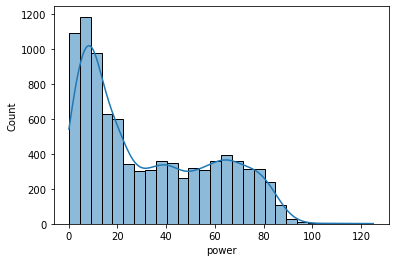

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(sun_data['power'], kde=True)

<AxesSubplot:xlabel='power', ylabel='Count'>

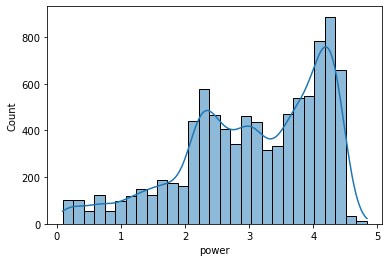

In [7]:
sun_data['power'] = np.log1p(sun_data['power'])
sns.histplot(sun_data['power'], kde=True)

In [11]:
from xgboost import XGBRegressor
from sktime.forecasting.model_selection import temporal_train_test_split
from sklearn.metrics import mean_squared_error, r2_score
xgb_reg = XGBRegressor(n_estimators=1000)
y_target = sun_data['power']
X_features=sun_data.drop(['datetime','power'], axis=1)
X_train,X_test,y_train,y_test = temporal_train_test_split(X_features, y_target, test_size=0.2)

In [14]:
X_train.shape, X_test.shape

((7320, 12), (1831, 12))

In [15]:
get_eval_model(xgb_reg, X_train,X_test,y_train,y_test)

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


mse : 0.1874, rmse : 0.4329, r2score : 0.8364


### 일사량, 온도 값들을 histgram을 보고 로그변환해서 예측하기

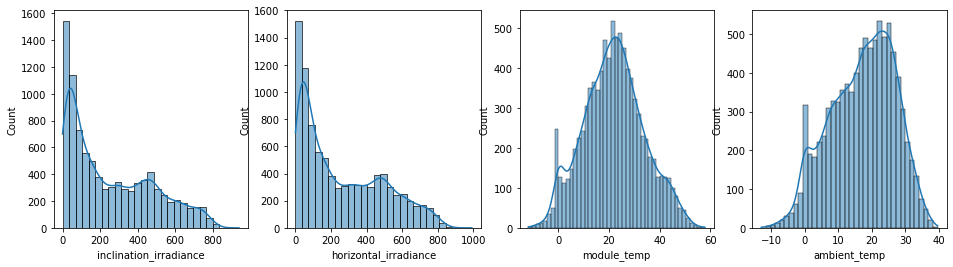

In [17]:
features=['inclination_irradiance','horizontal_irradiance','module_temp','ambient_temp']
fig, ax = plt.subplots(figsize=(16,4), nrows=1, ncols=4)
for i, feature in enumerate(features):
#     row=int(i/2)
#     col=i%2
    sns.histplot(sun_data[feature], kde=True, ax=ax[i])

In [18]:
features_log = ['inclination_irradiance','horizontal_irradiance']
sun_data[features_log]=np.log1p(sun_data[features_log])

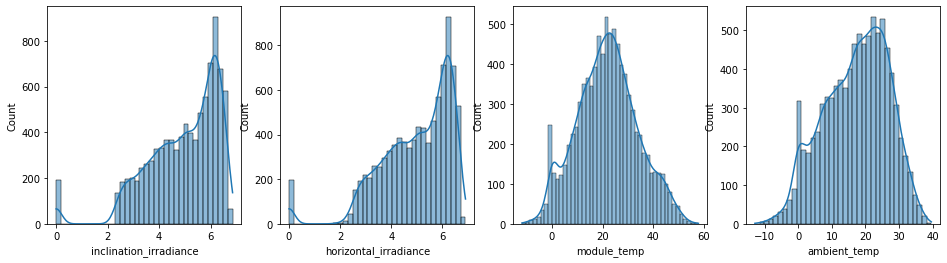

In [19]:
features=['inclination_irradiance','horizontal_irradiance','module_temp','ambient_temp']
fig, ax = plt.subplots(figsize=(16,4), nrows=1, ncols=4)
for i, feature in enumerate(features):
#     row=int(i/2)
#     col=i%2
    sns.histplot(sun_data[feature], kde=True, ax=ax[i])

In [23]:
xgb_reg = XGBRegressor(n_estimators=1000)
y_target = sun_data['power']
X_features=sun_data.drop(['datetime','power'], axis=1)
X_train,X_test,y_train,y_test = temporal_train_test_split(X_features, y_target, test_size=0.2)
get_eval_model(xgb_reg, X_train,X_test,y_train,y_test)

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


mse : 0.1878, rmse : 0.4334, r2score : 0.8360


In [24]:
sun_data.describe()

,power,inclination_irradiance,horizontal_irradiance,module_temp,ambient_temp,hour,day,month,week,season_autumn,season_spring,season_summer,season_winter
count,9151.000000,9151.000000,9151.000000,9151.000000,9151.000000,9151.000000,9151.000000,9151.000000,9151.000000,9151.000000,9151.000000,9151.000000,9151.000000
mean,3.066986,4.925046,4.966357,21.852265,17.170164,12.144465,3.014862,6.468364,26.256584,0.235821,0.267949,0.284559,0.211671
std,1.084203,1.381655,1.371350,11.880531,9.509531,3.761162,1.997429,3.268940,14.267972,0.424534,0.442915,0.451229,0.408515
min,0.086178,0.000000,0.000000,-11.840000,-12.900000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.311545,4.035656,4.085556,13.688968,10.130000,9.000000,1.000000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000
50%,3.195402,5.216022,5.241059,21.815254,18.250000,12.000000,3.000000,6.000000,26.000000,0.000000,0.000000,0.000000,0.000000
75%,4.039536,6.072330,6.114213,29.497500,24.580000,15.000000,5.000000,9.000000,38.000000,0.000000,1.000000,1.000000,0.000000
max,4.836282,6.845816,6.900076,57.846552,39.570000,20.000000,6.000000,12.000000,53.000000,1.000000,1.000000,1.000000,1.000000


### 날짜피처들을 원핫인코딩해서 예측

In [30]:
sun_data = pd.get_dummies(sun_data, columns=['hour','day','month','week'])

In [32]:
sun_data.shape

(9151, 98)

In [33]:
xgb_reg = XGBRegressor(n_estimators=1000)
y_target = sun_data['power']
X_features=sun_data.drop(['datetime','power'], axis=1)
X_train,X_test,y_train,y_test = temporal_train_test_split(X_features, y_target, test_size=0.2)
get_eval_model(xgb_reg, X_train,X_test,y_train,y_test)

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


mse : 0.1778, rmse : 0.4217, r2score : 0.8448


In [34]:
sun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9151 entries, 0 to 9150
Data columns (total 98 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   datetime                9151 non-null   object 
 1   power                   9151 non-null   float64
 2   inclination_irradiance  9151 non-null   float64
 3   horizontal_irradiance   9151 non-null   float64
 4   module_temp             9151 non-null   float64
 5   ambient_temp            9151 non-null   float64
 6   season_autumn           9151 non-null   int64  
 7   season_spring           9151 non-null   int64  
 8   season_summer           9151 non-null   int64  
 9   season_winter           9151 non-null   int64  
 10  hour_5                  9151 non-null   uint8  
 11  hour_6                  9151 non-null   uint8  
 12  hour_7                  9151 non-null   uint8  
 13  hour_8                  9151 non-null   uint8  
 14  hour_9                  9151 non-null   

### 하이퍼파라미터 조정

In [43]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score

def objective_func(search_space):
    xgb_reg = XGBRegressor(n_estimators=1000, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            subsample=search_space['subsample'],
                            reg_alpha=search_space['reg_alpha'],
                            eval_metric='rmse')
    scores = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
    return {'loss':-1 * np.mean(scores), 'status': STATUS_OK}

In [44]:
xgb_search_space = {'max_depth':hp.quniform('max_depth',4,20,1),
                   'min_child_weight':hp.quniform('min_child_weight', 1,5,1),
                   'learning_rate':hp.uniform('learning_rate',0.01,0.2),
                   'colsample_bytree':hp.uniform('colsample_bytree', 0.8,1),
                   'subsample':hp.uniform('subsample',0.8,1),
                   'reg_alpha':hp.uniform('reg_alpha',0,1)}
trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trial_val)
print('best:', best)

  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

  2%|▉                                             | 1/50 [01:29<1:12:47, 89.14s/trial, best loss: 0.13622089550668878]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

  4%|█▉                                              | 2/50 [02:13<50:24, 63.01s/trial, best loss: 0.13226112589844263]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

  6%|██▉                                             | 3/50 [02:42<37:07, 47.39s/trial, best loss: 0.13226112589844263]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

  8%|███▊                                            | 4/50 [04:14<49:40, 64.79s/trial, best loss: 0.13226112589844263]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 10%|████▊                                           | 5/50 [05:55<58:26, 77.93s/trial, best loss: 0.12668937983330522]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 12%|█████▍                                       | 6/50 [08:44<1:19:49, 108.86s/trial, best loss: 0.12668937983330522]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 14%|██████▍                                       | 7/50 [09:41<1:06:00, 92.09s/trial, best loss: 0.12330148856099281]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 16%|███████▏                                     | 8/50 [12:02<1:15:20, 107.62s/trial, best loss: 0.12330148856099281]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 18%|████████                                     | 9/50 [13:31<1:09:32, 101.77s/trial, best loss: 0.12103026748547992]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 20%|████████▊                                   | 10/50 [15:17<1:08:37, 102.94s/trial, best loss: 0.12103026748547992]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 22%|██████████▎                                    | 11/50 [16:23<59:40, 91.81s/trial, best loss: 0.12103026748547992]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 24%|███████████▎                                   | 12/50 [17:34<54:04, 85.37s/trial, best loss: 0.12103026748547992]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 26%|████████████▏                                  | 13/50 [18:03<42:07, 68.32s/trial, best loss: 0.12103026748547992]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 28%|█████████████▏                                 | 14/50 [19:13<41:18, 68.86s/trial, best loss: 0.12103026748547992]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 30%|██████████████                                 | 15/50 [20:06<37:19, 63.98s/trial, best loss: 0.12103026748547992]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 32%|███████████████                                | 16/50 [21:17<37:26, 66.06s/trial, best loss: 0.12103026748547992]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 34%|███████████████▉                               | 17/50 [21:48<30:31, 55.49s/trial, best loss: 0.12103026748547992]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 36%|████████████████▉                              | 18/50 [23:12<34:15, 64.24s/trial, best loss: 0.12103026748547992]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 38%|█████████████████▊                             | 19/50 [24:15<33:00, 63.87s/trial, best loss: 0.12103026748547992]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 40%|██████████████████▊                            | 20/50 [25:39<34:58, 69.94s/trial, best loss: 0.12103026748547992]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 42%|███████████████████▋                           | 21/50 [26:21<29:44, 61.53s/trial, best loss: 0.12103026748547992]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 44%|████████████████████▋                          | 22/50 [27:05<26:16, 56.30s/trial, best loss: 0.12103026748547992]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 46%|█████████████████████▌                         | 23/50 [27:49<23:36, 52.46s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 48%|██████████████████████▌                        | 24/50 [28:44<23:05, 53.27s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 50%|███████████████████████▌                       | 25/50 [29:39<22:21, 53.67s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 52%|████████████████████████▍                      | 26/50 [30:06<18:19, 45.82s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 54%|█████████████████████████▍                     | 27/50 [31:34<22:26, 58.56s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 56%|██████████████████████████▎                    | 28/50 [32:37<21:55, 59.82s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 58%|███████████████████████████▎                   | 29/50 [33:22<19:21, 55.31s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 60%|████████████████████████████▏                  | 30/50 [34:28<19:30, 58.53s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 62%|█████████████████████████████▏                 | 31/50 [35:41<19:56, 63.00s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 64%|██████████████████████████████                 | 32/50 [36:34<17:59, 59.99s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 66%|███████████████████████████████                | 33/50 [37:20<15:47, 55.74s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 68%|███████████████████████████████▉               | 34/50 [38:35<16:25, 61.61s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 70%|████████████████████████████████▉              | 35/50 [39:00<12:35, 50.40s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 72%|█████████████████████████████████▊             | 36/50 [40:45<15:35, 66.80s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 74%|██████████████████████████████████▊            | 37/50 [41:42<13:51, 63.96s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 76%|███████████████████████████████████▋           | 38/50 [42:19<11:11, 55.94s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 78%|████████████████████████████████████▋          | 39/50 [42:51<08:54, 48.59s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 80%|█████████████████████████████████████▌         | 40/50 [44:29<10:34, 63.40s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 82%|██████████████████████████████████████▌        | 41/50 [46:00<10:45, 71.69s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 84%|███████████████████████████████████████▍       | 42/50 [47:31<10:19, 77.49s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 86%|████████████████████████████████████████▍      | 43/50 [48:36<08:36, 73.85s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 88%|█████████████████████████████████████████▎     | 44/50 [49:11<06:12, 62.03s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 90%|██████████████████████████████████████████▎    | 45/50 [49:56<04:45, 57.18s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 92%|███████████████████████████████████████████▏   | 46/50 [50:55<03:49, 57.49s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 94%|████████████████████████████████████████████▏  | 47/50 [51:54<02:54, 58.05s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 96%|█████████████████████████████████████████████  | 48/50 [53:12<02:07, 63.98s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

 98%|██████████████████████████████████████████████ | 49/50 [54:27<01:07, 67.36s/trial, best loss: 0.11861211221274608]

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropria

100%|███████████████████████████████████████████████| 50/50 [55:08<00:00, 66.17s/trial, best loss: 0.11861211221274608]
best: {'colsample_bytree': 0.9688554828042355, 'learning_rate': 0.011207661626770308, 'max_depth': 7.0, 'min_child_weight': 2.0, 'reg_alpha': 0.27051239929162285, 'subsample': 0.9892153737967706}


In [46]:
xgb_reg = XGBRegressor(n_estimators=10000, learning_rate=round(best['learning_rate'], 5), 
                            max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'], 5), subsample=round(best['subsample'],5),
                       reg_alpha=round(best['reg_alpha'],5)
                           )
X_tr,X_val,y_tr,y_val = temporal_train_test_split(X_train,y_train,test_size=0.2)
evals=[(X_tr,y_tr),(X_val,y_val)]
xgb_reg.fit(X_tr,y_tr, early_stopping_rounds=1000, eval_metric='rmse', eval_set=evals, verbose=True)
pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, pred)
print('mse : {0:.4f}, rmse : {1:.4f}, r2score : {2:.4f}'.format(mse, rmse, r2score))    

[0]	validation_0-rmse:2.77755	validation_1-rmse:2.77942
[1]	validation_0-rmse:2.74698	validation_1-rmse:2.74925
[2]	validation_0-rmse:2.71675	validation_1-rmse:2.71941
[3]	validation_0-rmse:2.68687	validation_1-rmse:2.68994
[4]	validation_0-rmse:2.65734	validation_1-rmse:2.66070
[5]	validation_0-rmse:2.62812	validation_1-rmse:2.63185
[6]	validation_0-rmse:2.59925	validation_1-rmse:2.60329
[7]	validation_0-rmse:2.57070	validation_1-rmse:2.57519
[8]	validation_0-rmse:2.54245	validation_1-rmse:2.54730
[9]	validation_0-rmse:2.51455	validation_1-rmse:2.51972
[10]	validation_0-rmse:2.48696	validation_1-rmse:2.49248
[11]	validation_0-rmse:2.45967	validation_1-rmse:2.46546
[12]	validation_0-rmse:2.43270	validation_1-rmse:2.43896
[13]	validation_0-rmse:2.40603	validation_1-rmse:2.41247
[14]	validation_0-rmse:2.37967	validation_1-rmse:2.38637


C:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-rmse:2.35361	validation_1-rmse:2.36064
[16]	validation_0-rmse:2.32784	validation_1-rmse:2.33514
[17]	validation_0-rmse:2.30236	validation_1-rmse:2.30988
[18]	validation_0-rmse:2.27716	validation_1-rmse:2.28495
[19]	validation_0-rmse:2.25226	validation_1-rmse:2.26034
[20]	validation_0-rmse:2.22764	validation_1-rmse:2.23598
[21]	validation_0-rmse:2.20329	validation_1-rmse:2.21194
[22]	validation_0-rmse:2.17925	validation_1-rmse:2.18811
[23]	validation_0-rmse:2.15546	validation_1-rmse:2.16457
[24]	validation_0-rmse:2.13196	validation_1-rmse:2.14127
[25]	validation_0-rmse:2.10871	validation_1-rmse:2.11836
[26]	validation_0-rmse:2.08573	validation_1-rmse:2.09567
[27]	validation_0-rmse:2.06302	validation_1-rmse:2.07317
[28]	validation_0-rmse:2.04055	validation_1-rmse:2.05091
[29]	validation_0-rmse:2.01835	validation_1-rmse:2.02890
[30]	validation_0-rmse:1.99641	validation_1-rmse:2.00724
[31]	validation_0-rmse:1.97470	validation_1-rmse:1.98572
[32]	validation_0-rmse:1.95325	

[157]	validation_0-rmse:0.56215	validation_1-rmse:0.57554
[158]	validation_0-rmse:0.55758	validation_1-rmse:0.57097
[159]	validation_0-rmse:0.55305	validation_1-rmse:0.56636
[160]	validation_0-rmse:0.54855	validation_1-rmse:0.56196
[161]	validation_0-rmse:0.54416	validation_1-rmse:0.55751
[162]	validation_0-rmse:0.53985	validation_1-rmse:0.55304
[163]	validation_0-rmse:0.53549	validation_1-rmse:0.54882
[164]	validation_0-rmse:0.53127	validation_1-rmse:0.54462
[165]	validation_0-rmse:0.52708	validation_1-rmse:0.54046
[166]	validation_0-rmse:0.52294	validation_1-rmse:0.53614
[167]	validation_0-rmse:0.51890	validation_1-rmse:0.53202
[168]	validation_0-rmse:0.51490	validation_1-rmse:0.52799
[169]	validation_0-rmse:0.51089	validation_1-rmse:0.52402
[170]	validation_0-rmse:0.50699	validation_1-rmse:0.52004
[171]	validation_0-rmse:0.50312	validation_1-rmse:0.51611
[172]	validation_0-rmse:0.49931	validation_1-rmse:0.51231
[173]	validation_0-rmse:0.49558	validation_1-rmse:0.50859
[174]	validati

[298]	validation_0-rmse:0.28976	validation_1-rmse:0.29825
[299]	validation_0-rmse:0.28929	validation_1-rmse:0.29773
[300]	validation_0-rmse:0.28878	validation_1-rmse:0.29727
[301]	validation_0-rmse:0.28823	validation_1-rmse:0.29674
[302]	validation_0-rmse:0.28771	validation_1-rmse:0.29629
[303]	validation_0-rmse:0.28725	validation_1-rmse:0.29579
[304]	validation_0-rmse:0.28675	validation_1-rmse:0.29532
[305]	validation_0-rmse:0.28625	validation_1-rmse:0.29481
[306]	validation_0-rmse:0.28584	validation_1-rmse:0.29433
[307]	validation_0-rmse:0.28532	validation_1-rmse:0.29386
[308]	validation_0-rmse:0.28488	validation_1-rmse:0.29338
[309]	validation_0-rmse:0.28440	validation_1-rmse:0.29285
[310]	validation_0-rmse:0.28393	validation_1-rmse:0.29240
[311]	validation_0-rmse:0.28345	validation_1-rmse:0.29193
[312]	validation_0-rmse:0.28304	validation_1-rmse:0.29146
[313]	validation_0-rmse:0.28256	validation_1-rmse:0.29094
[314]	validation_0-rmse:0.28213	validation_1-rmse:0.29050
[315]	validati

[439]	validation_0-rmse:0.25333	validation_1-rmse:0.26943
[440]	validation_0-rmse:0.25315	validation_1-rmse:0.26935
[441]	validation_0-rmse:0.25309	validation_1-rmse:0.26932
[442]	validation_0-rmse:0.25289	validation_1-rmse:0.26921
[443]	validation_0-rmse:0.25278	validation_1-rmse:0.26929
[444]	validation_0-rmse:0.25269	validation_1-rmse:0.26924
[445]	validation_0-rmse:0.25252	validation_1-rmse:0.26914
[446]	validation_0-rmse:0.25234	validation_1-rmse:0.26908
[447]	validation_0-rmse:0.25217	validation_1-rmse:0.26909
[448]	validation_0-rmse:0.25204	validation_1-rmse:0.26902
[449]	validation_0-rmse:0.25188	validation_1-rmse:0.26893
[450]	validation_0-rmse:0.25166	validation_1-rmse:0.26891
[451]	validation_0-rmse:0.25161	validation_1-rmse:0.26885
[452]	validation_0-rmse:0.25147	validation_1-rmse:0.26879
[453]	validation_0-rmse:0.25131	validation_1-rmse:0.26873
[454]	validation_0-rmse:0.25119	validation_1-rmse:0.26869
[455]	validation_0-rmse:0.25111	validation_1-rmse:0.26863
[456]	validati

[580]	validation_0-rmse:0.23490	validation_1-rmse:0.26671
[581]	validation_0-rmse:0.23480	validation_1-rmse:0.26670
[582]	validation_0-rmse:0.23476	validation_1-rmse:0.26671
[583]	validation_0-rmse:0.23456	validation_1-rmse:0.26676
[584]	validation_0-rmse:0.23451	validation_1-rmse:0.26675
[585]	validation_0-rmse:0.23444	validation_1-rmse:0.26673
[586]	validation_0-rmse:0.23433	validation_1-rmse:0.26678
[587]	validation_0-rmse:0.23420	validation_1-rmse:0.26676
[588]	validation_0-rmse:0.23416	validation_1-rmse:0.26675
[589]	validation_0-rmse:0.23409	validation_1-rmse:0.26676
[590]	validation_0-rmse:0.23398	validation_1-rmse:0.26682
[591]	validation_0-rmse:0.23388	validation_1-rmse:0.26680
[592]	validation_0-rmse:0.23380	validation_1-rmse:0.26682
[593]	validation_0-rmse:0.23375	validation_1-rmse:0.26678
[594]	validation_0-rmse:0.23368	validation_1-rmse:0.26677
[595]	validation_0-rmse:0.23357	validation_1-rmse:0.26675
[596]	validation_0-rmse:0.23342	validation_1-rmse:0.26679
[597]	validati

[721]	validation_0-rmse:0.22247	validation_1-rmse:0.26879
[722]	validation_0-rmse:0.22223	validation_1-rmse:0.26874
[723]	validation_0-rmse:0.22214	validation_1-rmse:0.26874
[724]	validation_0-rmse:0.22211	validation_1-rmse:0.26874
[725]	validation_0-rmse:0.22203	validation_1-rmse:0.26874
[726]	validation_0-rmse:0.22189	validation_1-rmse:0.26880
[727]	validation_0-rmse:0.22178	validation_1-rmse:0.26885
[728]	validation_0-rmse:0.22165	validation_1-rmse:0.26885
[729]	validation_0-rmse:0.22161	validation_1-rmse:0.26885
[730]	validation_0-rmse:0.22149	validation_1-rmse:0.26887
[731]	validation_0-rmse:0.22143	validation_1-rmse:0.26892
[732]	validation_0-rmse:0.22136	validation_1-rmse:0.26898
[733]	validation_0-rmse:0.22123	validation_1-rmse:0.26907
[734]	validation_0-rmse:0.22110	validation_1-rmse:0.26906
[735]	validation_0-rmse:0.22107	validation_1-rmse:0.26906
[736]	validation_0-rmse:0.22098	validation_1-rmse:0.26907
[737]	validation_0-rmse:0.22087	validation_1-rmse:0.26914
[738]	validati

[863]	validation_0-rmse:0.21192	validation_1-rmse:0.27151
[864]	validation_0-rmse:0.21186	validation_1-rmse:0.27153
[865]	validation_0-rmse:0.21174	validation_1-rmse:0.27156
[866]	validation_0-rmse:0.21169	validation_1-rmse:0.27157
[867]	validation_0-rmse:0.21161	validation_1-rmse:0.27163
[868]	validation_0-rmse:0.21155	validation_1-rmse:0.27163
[869]	validation_0-rmse:0.21152	validation_1-rmse:0.27163
[870]	validation_0-rmse:0.21144	validation_1-rmse:0.27166
[871]	validation_0-rmse:0.21133	validation_1-rmse:0.27167
[872]	validation_0-rmse:0.21117	validation_1-rmse:0.27163
[873]	validation_0-rmse:0.21113	validation_1-rmse:0.27164
[874]	validation_0-rmse:0.21105	validation_1-rmse:0.27165
[875]	validation_0-rmse:0.21095	validation_1-rmse:0.27170
[876]	validation_0-rmse:0.21093	validation_1-rmse:0.27170
[877]	validation_0-rmse:0.21074	validation_1-rmse:0.27176
[878]	validation_0-rmse:0.21070	validation_1-rmse:0.27181
[879]	validation_0-rmse:0.21060	validation_1-rmse:0.27183
[880]	validati

[1004]	validation_0-rmse:0.20278	validation_1-rmse:0.27326
[1005]	validation_0-rmse:0.20268	validation_1-rmse:0.27323
[1006]	validation_0-rmse:0.20262	validation_1-rmse:0.27323
[1007]	validation_0-rmse:0.20260	validation_1-rmse:0.27326
[1008]	validation_0-rmse:0.20254	validation_1-rmse:0.27324
[1009]	validation_0-rmse:0.20247	validation_1-rmse:0.27325
[1010]	validation_0-rmse:0.20241	validation_1-rmse:0.27332
[1011]	validation_0-rmse:0.20233	validation_1-rmse:0.27330
[1012]	validation_0-rmse:0.20228	validation_1-rmse:0.27332
[1013]	validation_0-rmse:0.20213	validation_1-rmse:0.27332
[1014]	validation_0-rmse:0.20202	validation_1-rmse:0.27340
[1015]	validation_0-rmse:0.20197	validation_1-rmse:0.27340
[1016]	validation_0-rmse:0.20191	validation_1-rmse:0.27340
[1017]	validation_0-rmse:0.20183	validation_1-rmse:0.27339
[1018]	validation_0-rmse:0.20176	validation_1-rmse:0.27340
[1019]	validation_0-rmse:0.20173	validation_1-rmse:0.27340
[1020]	validation_0-rmse:0.20166	validation_1-rmse:0.273

[1142]	validation_0-rmse:0.19441	validation_1-rmse:0.27393
[1143]	validation_0-rmse:0.19441	validation_1-rmse:0.27395
[1144]	validation_0-rmse:0.19434	validation_1-rmse:0.27396
[1145]	validation_0-rmse:0.19430	validation_1-rmse:0.27399
[1146]	validation_0-rmse:0.19414	validation_1-rmse:0.27402
[1147]	validation_0-rmse:0.19414	validation_1-rmse:0.27402
[1148]	validation_0-rmse:0.19400	validation_1-rmse:0.27407
[1149]	validation_0-rmse:0.19394	validation_1-rmse:0.27408
[1150]	validation_0-rmse:0.19390	validation_1-rmse:0.27406
[1151]	validation_0-rmse:0.19384	validation_1-rmse:0.27407
[1152]	validation_0-rmse:0.19379	validation_1-rmse:0.27407
[1153]	validation_0-rmse:0.19373	validation_1-rmse:0.27408
[1154]	validation_0-rmse:0.19359	validation_1-rmse:0.27410
[1155]	validation_0-rmse:0.19354	validation_1-rmse:0.27410
[1156]	validation_0-rmse:0.19351	validation_1-rmse:0.27411
[1157]	validation_0-rmse:0.19347	validation_1-rmse:0.27413
[1158]	validation_0-rmse:0.19342	validation_1-rmse:0.274

[1280]	validation_0-rmse:0.18723	validation_1-rmse:0.27466
[1281]	validation_0-rmse:0.18719	validation_1-rmse:0.27469
[1282]	validation_0-rmse:0.18713	validation_1-rmse:0.27469
[1283]	validation_0-rmse:0.18707	validation_1-rmse:0.27471
[1284]	validation_0-rmse:0.18701	validation_1-rmse:0.27472
[1285]	validation_0-rmse:0.18697	validation_1-rmse:0.27470
[1286]	validation_0-rmse:0.18691	validation_1-rmse:0.27470
[1287]	validation_0-rmse:0.18684	validation_1-rmse:0.27469
[1288]	validation_0-rmse:0.18674	validation_1-rmse:0.27466
[1289]	validation_0-rmse:0.18669	validation_1-rmse:0.27465
[1290]	validation_0-rmse:0.18662	validation_1-rmse:0.27467
[1291]	validation_0-rmse:0.18657	validation_1-rmse:0.27469
[1292]	validation_0-rmse:0.18656	validation_1-rmse:0.27472
[1293]	validation_0-rmse:0.18651	validation_1-rmse:0.27471
[1294]	validation_0-rmse:0.18648	validation_1-rmse:0.27471
[1295]	validation_0-rmse:0.18643	validation_1-rmse:0.27472
[1296]	validation_0-rmse:0.18639	validation_1-rmse:0.274

[1419]	validation_0-rmse:0.17974	validation_1-rmse:0.27595
[1420]	validation_0-rmse:0.17967	validation_1-rmse:0.27595
[1421]	validation_0-rmse:0.17962	validation_1-rmse:0.27594
[1422]	validation_0-rmse:0.17961	validation_1-rmse:0.27594
[1423]	validation_0-rmse:0.17955	validation_1-rmse:0.27598
[1424]	validation_0-rmse:0.17949	validation_1-rmse:0.27598
[1425]	validation_0-rmse:0.17944	validation_1-rmse:0.27599
[1426]	validation_0-rmse:0.17941	validation_1-rmse:0.27601
[1427]	validation_0-rmse:0.17939	validation_1-rmse:0.27603
[1428]	validation_0-rmse:0.17935	validation_1-rmse:0.27602
[1429]	validation_0-rmse:0.17930	validation_1-rmse:0.27605
[1430]	validation_0-rmse:0.17926	validation_1-rmse:0.27606
[1431]	validation_0-rmse:0.17922	validation_1-rmse:0.27606
[1432]	validation_0-rmse:0.17915	validation_1-rmse:0.27604
[1433]	validation_0-rmse:0.17911	validation_1-rmse:0.27605
[1434]	validation_0-rmse:0.17905	validation_1-rmse:0.27603
[1435]	validation_0-rmse:0.17892	validation_1-rmse:0.276

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='power'>)

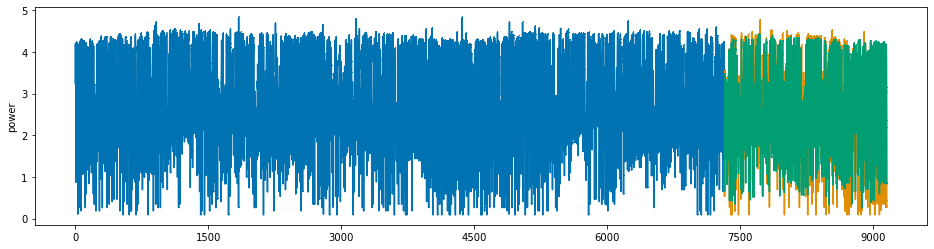

In [52]:
from sktime.utils.plotting import plot_series
pred = pd.Series(pred)
pred.index = np.arange(y_test.index[0], y_test.index[-1]+1)
plot_series(y_train, y_test, pd.Series(pred), markers=[',' , ',', ','])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='power'>)

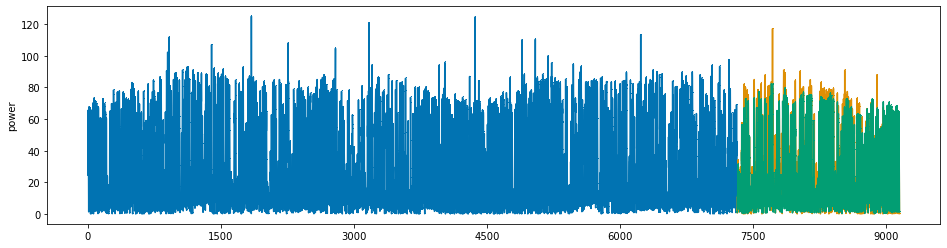

In [51]:
from sktime.utils.plotting import plot_series
y_train_org = np.expm1(y_train)
y_test_org = np.expm1(y_test)
pred_org = np.expm1(pred)
pred_org = pd.Series(pred_org)
pred_org.index = np.arange(y_test_org.index[0], y_test_org.index[-1]+1)
plot_series(y_train_org, y_test_org, pd.Series(pred_org), markers=[',' , ',', ','])

<AxesSubplot:>

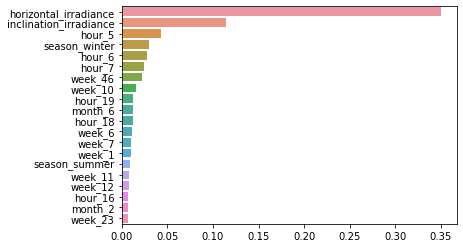

In [53]:
feature_importances = pd.Series(xgb_reg.feature_importances_, index=X_train.columns)
ftr_top20 = feature_importances.sort_values(ascending=False)[:20]
sns.barplot(x=ftr_top20.values, y=ftr_top20.index)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

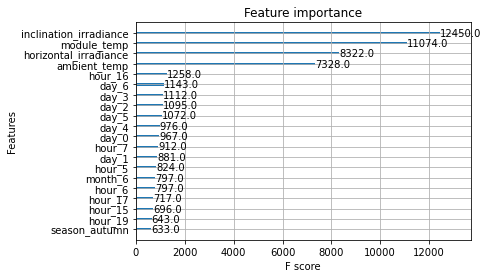

In [55]:
from xgboost import plot_importance
plot_importance(xgb_reg,max_num_features=20)

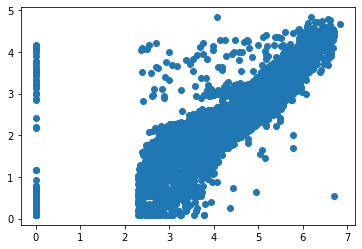

In [56]:
plt.scatter(x=sun_data.inclination_irradiance, y=sun_data.power)